In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read file path
df = pd.read_csv('/content/drive/MyDrive/Data/Superstore.csv', index_col=0, encoding='latin-1')
#Display all columns
pd.set_option('display.max_columns', None)
#Display first five rows of data
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Data Exploration

Goals:


*   Familiarize ourselves with the data
*   Observe trends or discrepanices


In [4]:
#Easy view of all columns, no duplicates found
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
#Check for missing values
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
#There are 5 columns with numerical values
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#The rest of the columns are string values
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Key insights:

*   Let's take a look at the distrubution for the numerical values
*   Histograms help to observe where the data is located and allow for general view of outliers






array([[<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

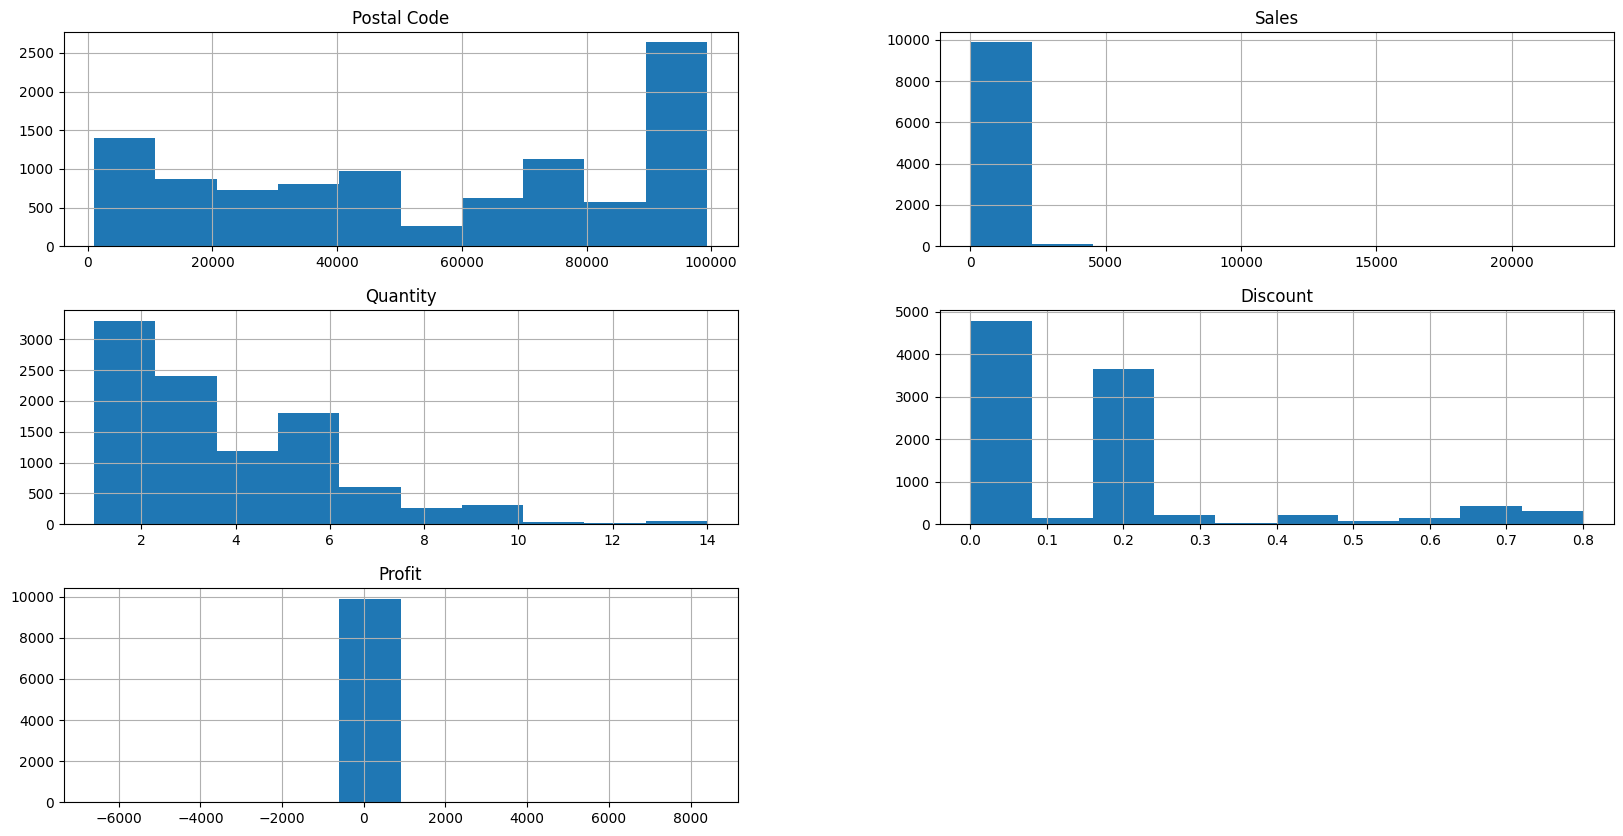

In [8]:
df.hist(bins=10, figsize=(20,10))

Key insights:



*  The data for sales and profit does not seem to be distrubuted evenly
*   Let's take a closer look at this data



In [9]:
#Observing the sales historgram
df[df['Sales']>5000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
166,CA-2011-139892,08-09-2011,12-09-2011,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
510,CA-2012-145352,16-03-2012,22-03-2012,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
684,US-2014-168116,05-11-2014,05-11-2014,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2506,CA-2011-143917,25-07-2011,27-07-2011,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,San Francisco,California,94122,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650,5,0.0,327.5060
2624,CA-2014-127180,23-10-2014,25-10-2014,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
2698,CA-2011-145317,18-03-2011,23-03-2011,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
4099,CA-2011-116904,23-09-2011,28-09-2011,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4191,CA-2014-166709,18-11-2014,23-11-2014,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
4278,US-2013-107440,17-04-2013,21-04-2013,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818


In [10]:
#Observing the profit histogram, looking for values greater than 8000
df[df['Profit']>8000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
6827,CA-2013-118689,03-10-2013,10-10-2013,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976


In [11]:
#Observing the profit histogram, looking for values less than 0
df[df['Profit']<0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
15,US-2012-118983,22-11-2012,26-11-2012,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
16,US-2012-118983,22-11-2012,26-11-2012,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
24,US-2014-156909,17-07-2014,19-07-2014,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
28,US-2012-150630,17-09-2012,21-09-2012,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,CA-2013-149272,16-03-2013,20-03-2013,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,Texas,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9922,CA-2011-111360,24-11-2011,30-11-2011,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9932,CA-2012-104948,13-11-2012,17-11-2012,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,California,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960


<Axes: xlabel='Order ID', ylabel='Profit'>

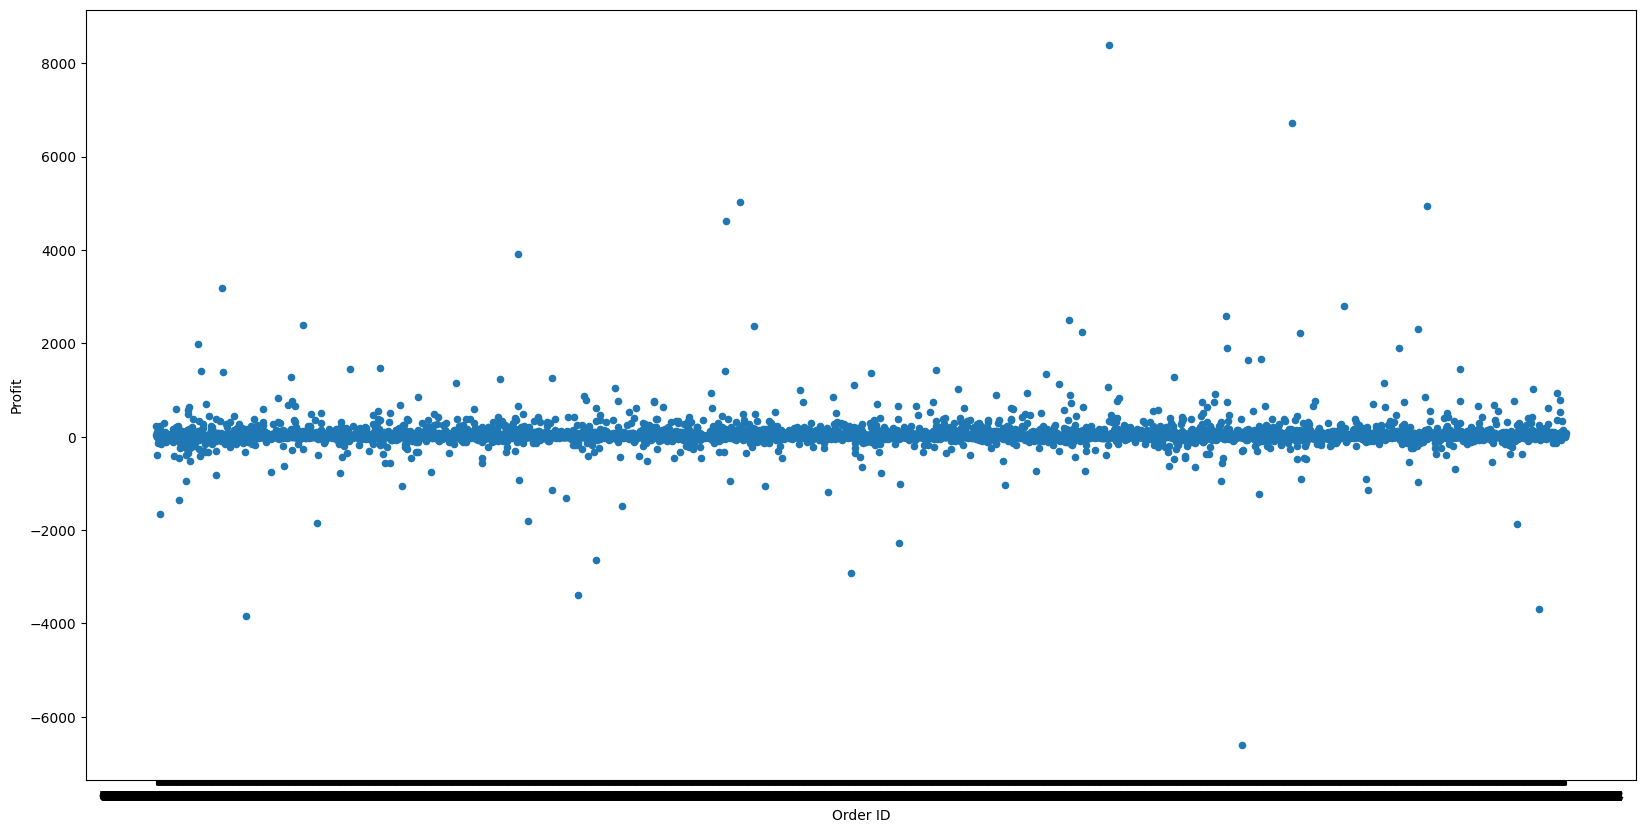

In [12]:
#Observing profit closer
df.plot.scatter(x='Order ID', y='Profit', figsize=(20,10))

Key insights:


*   Majority of the data point fall below 2000 and around 0
*  Highest profit is past 8000



<Axes: xlabel='Order ID', ylabel='Sales'>

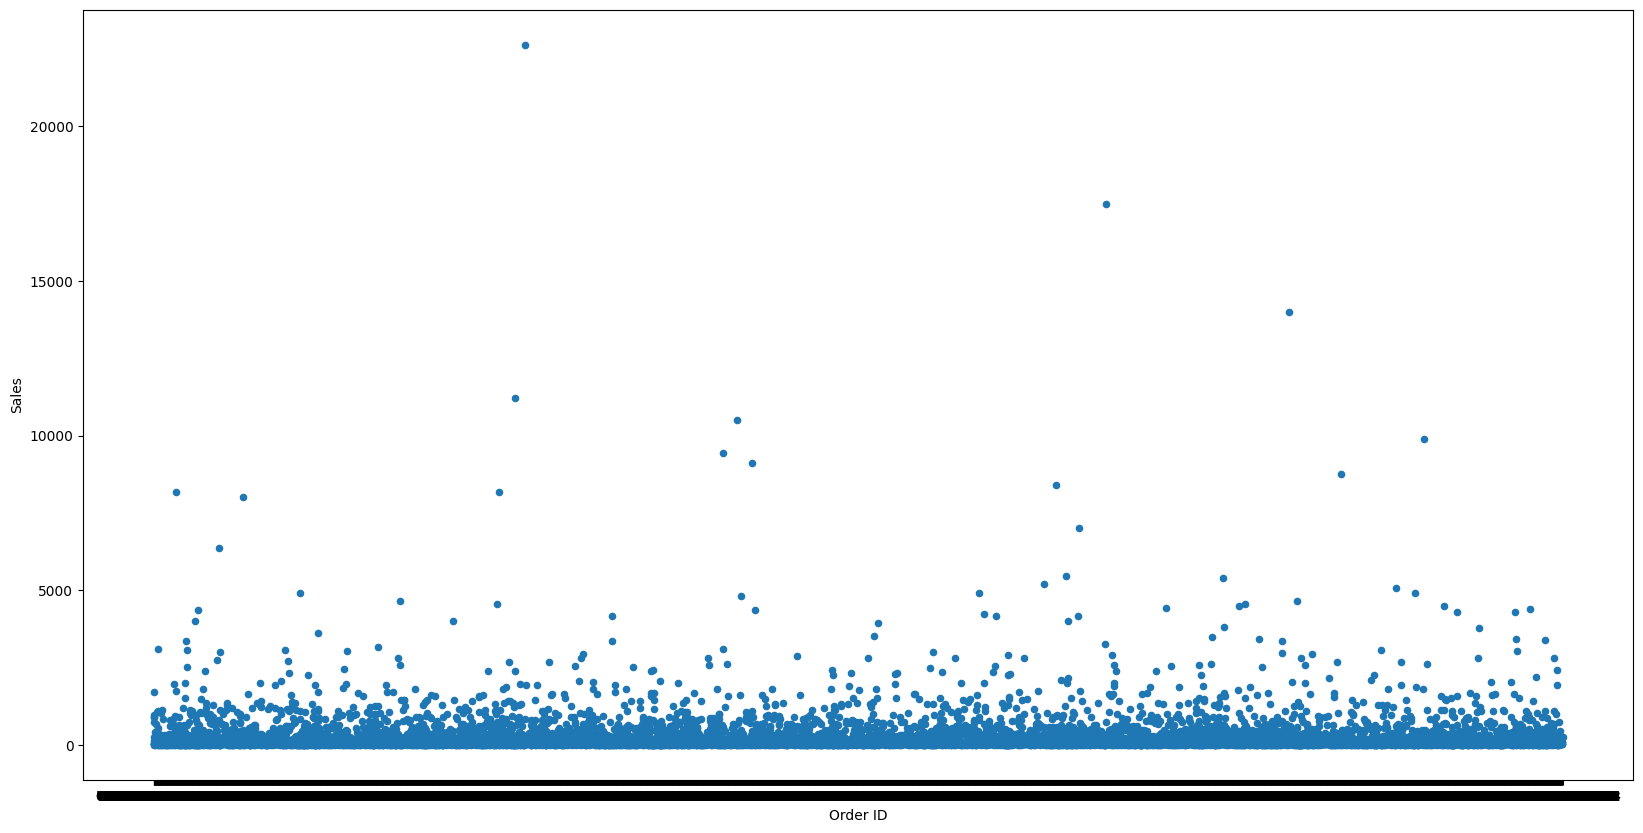

In [13]:
#Visualizing sales
df.plot.scatter(x='Order ID', y='Sales', figsize=(20,10))

<Axes: xlabel='Category'>

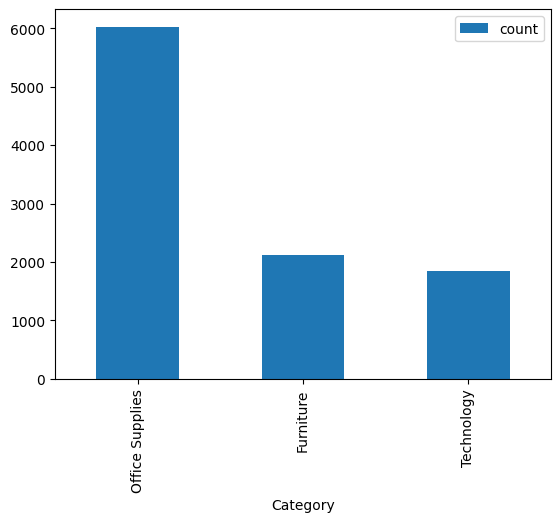

In [14]:
#Using counts to summarize the products in the categories
pd.DataFrame(df['Category'].value_counts()).plot(kind='bar')

Key Insights:

Since there are only 3 major categories, let's try using the sub-categories to better understand the types of products



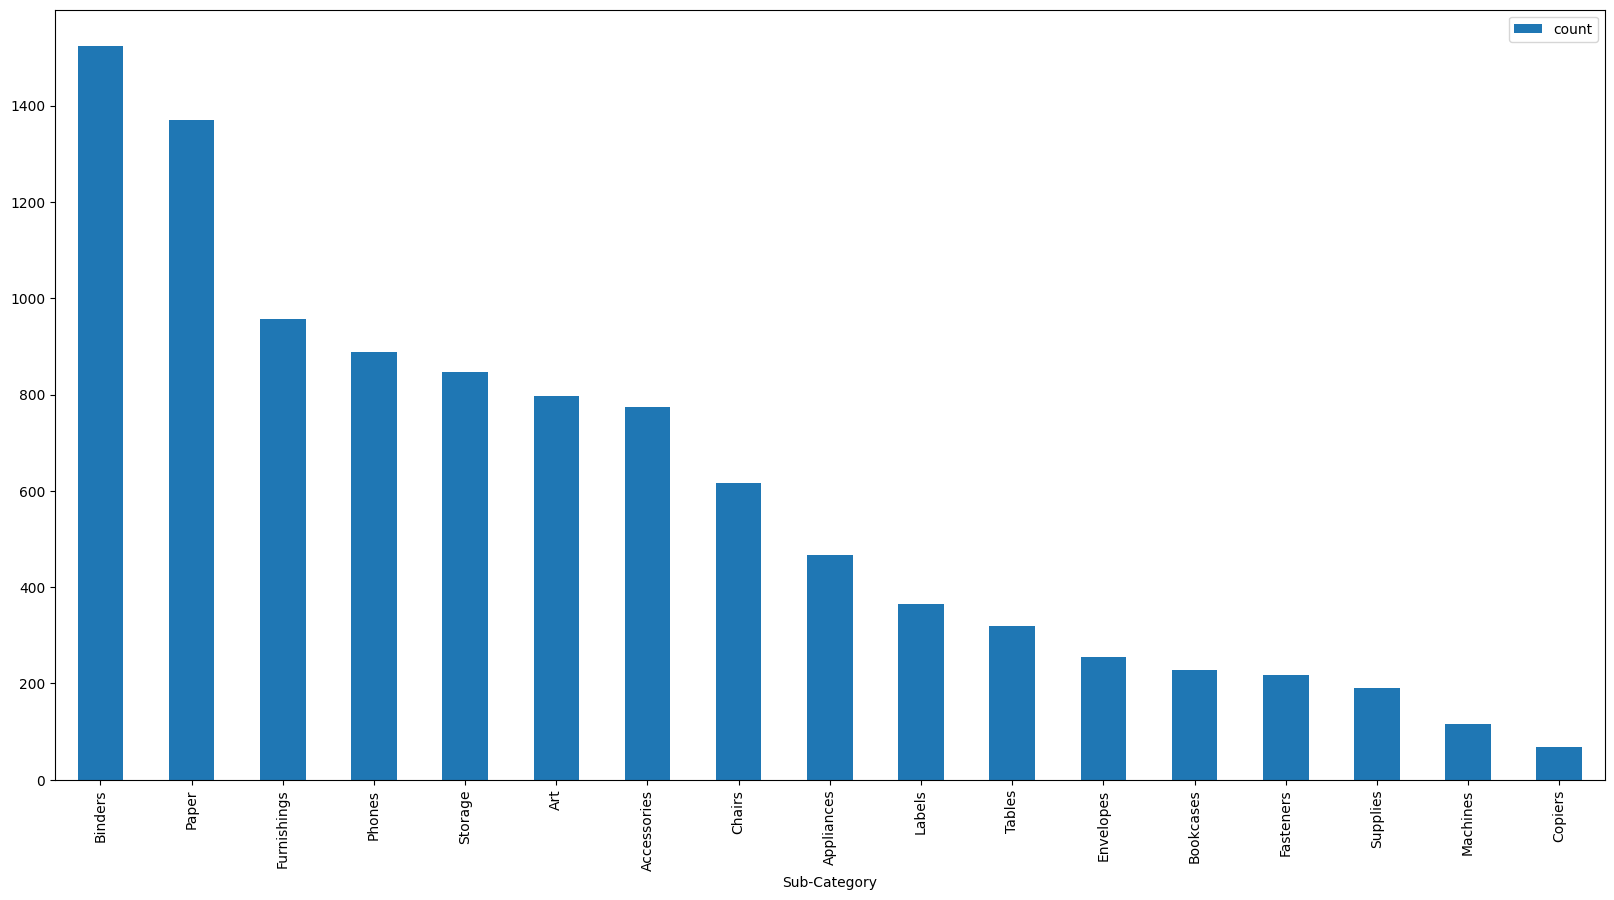

In [15]:
#Using counts to summarize the products in the categories
sub_df = pd.DataFrame(df['Sub-Category'].value_counts()).plot(kind='bar', figsize=(20,10))

Key insights:

Much better, we can see a larger set of categories

In [16]:
#Taking a look at how many segments there is
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [17]:
#Taking a look at how many countries are included
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

<Axes: xlabel='State'>

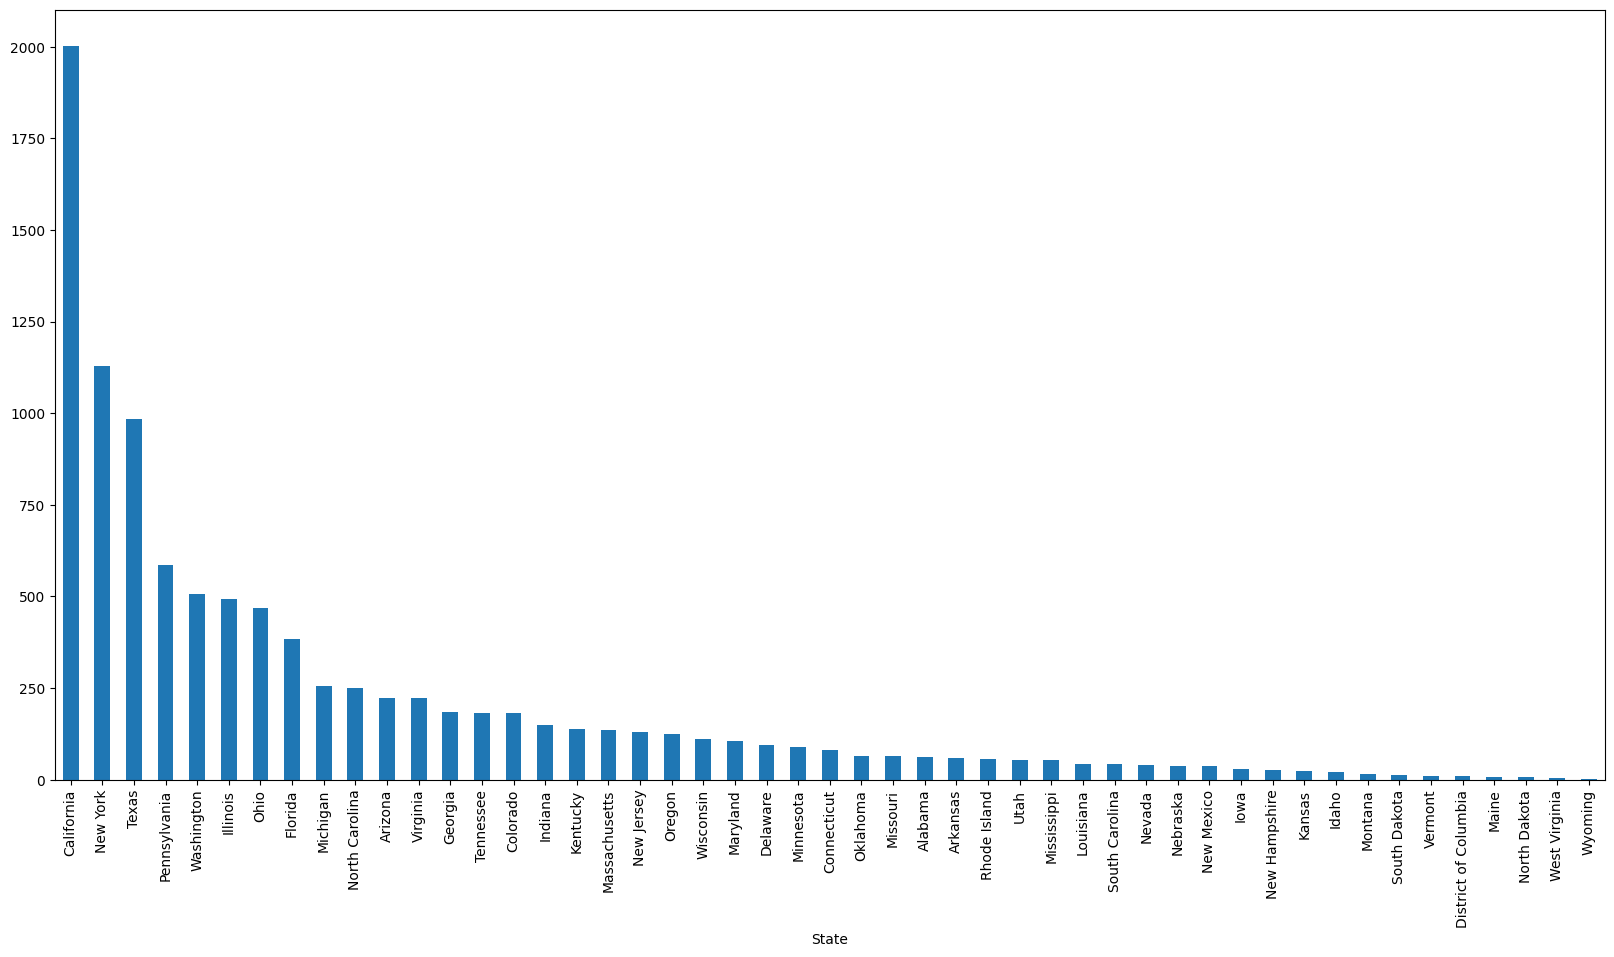

In [18]:
#Observing purchases made by state
df['State'].value_counts().plot(kind='bar', figsize=(20,10))

In [19]:
#Evaluating how many ship modes are available
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [20]:
#Evaluating the discounts available
df['Discount'].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [50]:
#Creates a correlation matrix to view the correlations between numerical values
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr(method="kendall")
#Prints matrix useful to observe what numerical values have a higher correlation
correlation_matrix

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.001465,0.010015,0.037496,-0.003111
Sales,-0.001465,1.000000,0.238978,-0.041826,0.452118
Quantity,0.010015,0.238978,1.000000,-0.000698,0.171843
Discount,0.037496,-0.041826,-0.000698,1.000000,-0.428205
Profit,-0.003111,0.452118,0.171843,-0.428205,1.000000


The closer to 1 the value is, the higher the correlation. The highest correaltion is between profit and sales.

Data Cleaning

Goals:

*   Ensure consistency with data items
*   Remove unnessacry  
  data

*Typically data cleaning would also involve handling missing data and outliers. Howevere this dataset contains no missing data and the outliers found in this dataset could help identify unusal behavior that might have led to company loss



In [21]:
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
7,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
8,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
9,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825


In [22]:
#Drop columns 'Customer Name' and 'Product Name' and creating updated df
sales_df = df.drop(columns=['Customer Name', 'Product Name'])

In [23]:
#Printing updated df
sales_df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164
6,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,48.8600,7,0.00,14.1694
7,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,7.2800,4,0.00,1.9656
8,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,907.1520,6,0.20,90.7152
9,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,18.5040,3,0.20,5.7825


Key insights:

The customer name and product name already had an ID assigned to them, therefore they are not needed for the analysis. The customer name and product ID are kept in the dataset in the event they are needed to search up or evaluate a specific product or customer.



In [24]:
sales_df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164
6,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,48.8600,7,0.00,14.1694
7,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,7.2800,4,0.00,1.9656
8,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,907.1520,6,0.20,90.7152
9,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,18.5040,3,0.20,5.7825


In [25]:
# Convert the 'Order Date' column to datetime format using the correct format string
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format="%d-%m-%Y")

In [26]:
# Convert the 'Ship Date' column to datetime format using the correct format string
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], format="%d-%m-%Y")

In [28]:
#Change the format of the dates from day/month/year to month/day/year
sales_df['Order Date'] = sales_df['Order Date'].dt.strftime('%m/%d/%Y')
print(sales_df) #Process was successful

              Order ID  Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                      
1       CA-2013-152156  11/09/2013 2013-11-12    Second Class    CG-12520   
2       CA-2013-152156  11/09/2013 2013-11-12    Second Class    CG-12520   
3       CA-2013-138688  06/13/2013 2013-06-17    Second Class    DV-13045   
4       US-2012-108966  10/11/2012 2012-10-18  Standard Class    SO-20335   
5       US-2012-108966  10/11/2012 2012-10-18  Standard Class    SO-20335   
...                ...         ...        ...             ...         ...   
9990    CA-2011-110422  01/22/2011 2011-01-24    Second Class    TB-21400   
9991    CA-2014-121258  02/27/2014 2014-03-04  Standard Class    DB-13060   
9992    CA-2014-121258  02/27/2014 2014-03-04  Standard Class    DB-13060   
9993    CA-2014-121258  02/27/2014 2014-03-04  Standard Class    DB-13060   
9994    CA-2014-119914  05/05/2014 2014-05-10    Second Class    CC-12220   

In [29]:
#Change the format of the dates from day/month/year to month/day/year
sales_df['Ship Date'] = sales_df['Ship Date'].dt.strftime('%m/%d/%Y')
print(sales_df) #Process was successful

              Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2013-152156  11/09/2013  11/12/2013    Second Class    CG-12520   
2       CA-2013-152156  11/09/2013  11/12/2013    Second Class    CG-12520   
3       CA-2013-138688  06/13/2013  06/17/2013    Second Class    DV-13045   
4       US-2012-108966  10/11/2012  10/18/2012  Standard Class    SO-20335   
5       US-2012-108966  10/11/2012  10/18/2012  Standard Class    SO-20335   
...                ...         ...         ...             ...         ...   
9990    CA-2011-110422  01/22/2011  01/24/2011    Second Class    TB-21400   
9991    CA-2014-121258  02/27/2014  03/04/2014  Standard Class    DB-13060   
9992    CA-2014-121258  02/27/2014  03/04/2014  Standard Class    DB-13060   
9993    CA-2014-121258  02/27/2014  03/04/2014  Standard Class    DB-13060   
9994    CA-2014-119914  05/05/2014  05/10/2014    Second Class  

The data is now ready to be used for analysis, machine learning, dashboards etc. The possibilities are endless!